In [ ]:
#Installing & Importing necessary librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
#Loading data
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Live Project\\2\\Data\\beverage_backup\\Beverage.csv")

In [ ]:
#Drop unecessary column
df.drop(['Unnamed: 0','Co2', 'Date_coder', 'Day', 'Hour', 'Month', 'PSP', 'Palletizer', 'Plasmax', 'Preform', 'Uday', 'Week', 'Year', 'product'], axis = 1, inplace = True)

In [ ]:
#Date & Time formatting
df['time'] = pd.to_datetime(df['time'], format= "%Y-%m-%d %H:%M:%S") 

In [ ]:
#Making time as index
df.index = df['time']

In [ ]:
#Aggregation by hour
df1 = df.resample('H').sum()
df1.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [ ]:
#Diving Blower values by 2 which ever exceeds 360000 bottles
df1['Blower'] = df1['Blower'].apply(lambda x: x/2 if x>=36000 else x)

In [ ]:
#Diving Blower values by 2 which ever exceeds 360000 bottles
df1['Labeller'] = df1['Labeller'].apply(lambda x: x if x>=36000 else x)

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

#The Dickey-Fuller test: It is used to determine the presence of unit root in a series, and hence help us to understand if the series is stationary or not.
#Null Hypothesis: The series has a unit root (value of a =1)
#Alternate Hypothesis: The series has no unit root
#If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

In [ ]:
test_result=adfuller(df1['Labeller'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Labeller):
    result=adfuller(Labeller)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df1['Labeller'])

ADF Test Statistic : -2.8396140611654768
p-value : 0.05283418417357014
#Lags Used : 8
Number of Observations Used : 242
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#The two most common ways to make a non-stationary time series stationary are: Differencing & Transforming
#Differencing: To make your series stationary, you take a difference between the data points. 
#Transforming: Log transform is probably the most commonly used transformation if we see the diverging time series. However, it is suggested that you use transformation only in case differencing is not working.

In [ ]:
#Differencing
df1['Labeller First Difference'] = df1['Labeller'] - df1['Labeller'].shift(1)

In [ ]:
df1['Labeller'].shift(1)

time
2020-08-16 00:00:00+00:00        NaN
2020-08-16 01:00:00+00:00        2.0
2020-08-16 02:00:00+00:00        0.0
2020-08-16 03:00:00+00:00        0.0
2020-08-16 04:00:00+00:00        0.0
                              ...   
2020-08-26 06:00:00+00:00    31461.0
2020-08-26 07:00:00+00:00    25599.0
2020-08-26 08:00:00+00:00    34699.0
2020-08-26 09:00:00+00:00    34753.0
2020-08-26 10:00:00+00:00    27556.0
Freq: H, Name: Labeller, Length: 251, dtype: float64

In [ ]:
df1['Seasonal First Difference'] = df1['Labeller']-df1['Labeller'].shift(24)

In [ ]:
df1.head(20)

,Blower,Filler,Labeller,Labeller First Difference,Seasonal First Difference
time,,,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,0.0,0.0,-2.0,NaN
2020-08-16 02:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 03:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 04:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 05:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 06:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 07:00:00+00:00,0.0,0.0,0.0,0.0,NaN
2020-08-16 08:00:00+00:00,0.0,3.0,0.0,0.0,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.6699265266694567
p-value : 0.004556609623666537
#Lags Used : 9
Number of Observations Used : 217
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


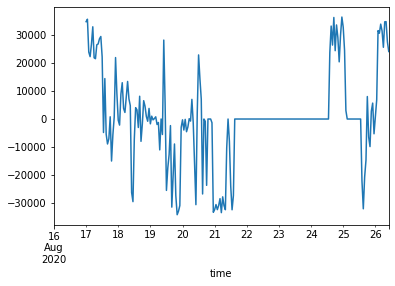

In [ ]:
df1['Seasonal First Difference'].plot()

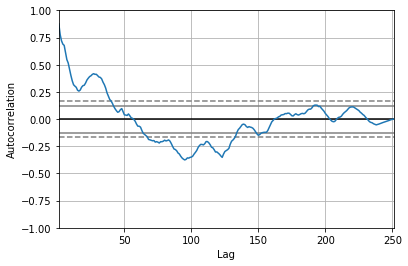

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Labeller'])
plt.show()

#ACF(auto-correlation function) : It describes how well the present value of the series is related to its past values.
#PACF(partial autocorrelation function) : Instead of finding correlations of present with lags like ACF, it finds the correlations of the residuals with the next lag value thus ‘partial’ and not ‘complete’ as we remove already found variations before we find next correlation.

In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Labeller'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Labeller'].iloc[0:],lags=40,ax=ax2)

NameError: ignored

ARIMA MODEL
Auto Regression Integrated Moving Average
It is specified by three parameters (p,d,q)
Here, p is the order of the autoregressive model (number of time lags)
d is the degree of differencing (no. of times the data have had passed values subtracted)
q is the order of moving average model
The ARIMA forecasting for a stationary time series is nothing but a linear (like linear regression) equation

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df1['Labeller'],order=(1,0,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
df1['forecast']=model_fit.predict(start=200,end=251,dynamic=True)
df1[['Labeller','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1['Labeller'],order=(1, 1, 1),seasonal_order=(1,1,1,24))
results=model.fit()

In [ ]:
results.summary()

In [ ]:
df1['forecast']=results.predict(start=200,end=251,dynamic=True)
df1[['Labeller','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(hours=x)for x in range(0,24)]

In [ ]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [ ]:
future_datest_df1.tail()

In [ ]:
future_datest_df1.head()

In [ ]:
future_df1=pd.concat([df1,future_datest_df1])

In [ ]:
future_df1.head()

In [ ]:
future_df1['forecast'] = results.predict(start = 251, end = 275, dynamic= True)  
future_df1[['Labeller', 'forecast']].plot(figsize=(12, 8))

In [ ]:
import dtale

In [ ]:
dtale.show(future_df1)

In [ ]:
#Creating a data frame to remove decimals in Labeller
df2 = future_df1.forecast
df2.dropna(inplace = True)
df2 = df2.astype(dtype = 'int64')

In [ ]:
future_df2=pd.concat([df,df2])
future_df2

In [ ]:
future_df2.rename(columns={ 0 :'forecast'}, inplace=True)
future_df2 = future_df2.iloc[:, [1, 2, 3, 4, 0]]

In [ ]:
#Forecasting final values of filler
dtale.show(future_df2)